In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid, trapezoid, quad, quad_vec

How to take integrals in python?

$$\int e^{-\sin^2(x)} dx $$

# Numerical Integration (Given Data)

As you saw in Assignment 2, one way of performing numerical integration is to compute the sum $\sum_i f(x_i) dx$ for some arbitrary function. For this, one needs data

In [2]:
def f(x):
    return np.exp(-np.sin(2*np.pi * x)**2)

We can compute $\int_0^1 f(x) dx$ as follows:

In [3]:
dx = 0.01
x = np.arange(0,1,0.01)

In [5]:
y = f(x)

In [7]:
dx = 0.01
x = np.arange(0,1,0.01)
y = f(x)
integral = sum(y*dx)
print(integral)

0.64503527044915


Getting $\int_0^x f(x') dx'$ required using the `cumsum` method:

In [8]:
dx = 0.01
x = np.arange(0,1,0.01)
y = f(x)
integral = np.cumsum(y*dx)

Then we can plot the function and its integral together:

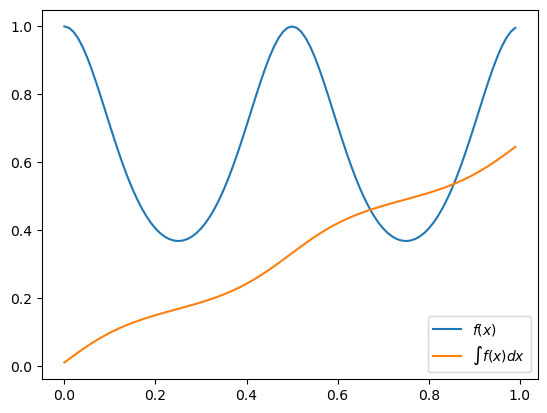

In [9]:
plt.plot(x, y, label='$f(x)$')
plt.plot(x, integral, label='$\int f(x) dx$')
plt.legend()

**It's better to use numpy functionality though. (This is a general theme throughout the course). The `trapezoid` function can compute the definite integral**

In [10]:
trapezoid(y, x)

0.6350549448856759

**And the `cumulative_trapezoid` can be used to get the indefinite integral (provided `initial` is provided)**

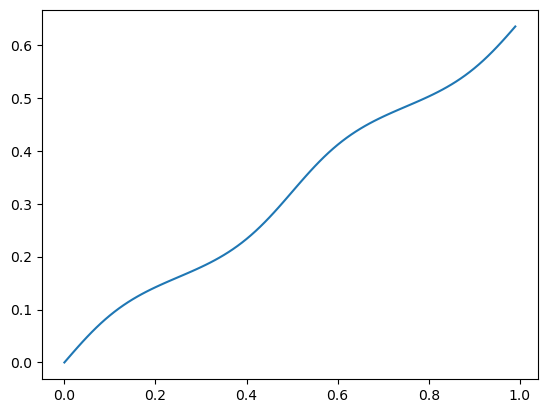

In [14]:
integral_y = cumulative_trapezoid(y, x, initial=0)
plt.plot(x,integral_y)

The `cumulative_trapezoid` function is particularily handy it can deal with unequally spaced $x$ data. This is particularily useful for certain datasets.

* The following is actual data collected in the lab (my undergraduate honours project) of a so-called "scintillator pulse". A scintillator is a type of crystal that emits light when a photon strikes it. When connected to appropriate electronics, a scintillator emits a current through a wire (so a voltage can be measured) whenever a photon strikes it

In [16]:
data = np.loadtxt('data/scintillator_pulse.csv', delimiter=',', skiprows=1)

In [17]:
data.shape

(16390, 2)

In [19]:
data.T.shape

(2, 16390)

In [20]:
time, voltage = data.T

Text(0, 0.5, 'Current [arb]')

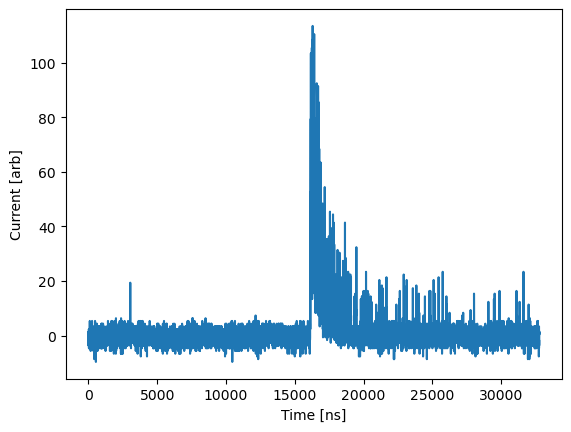

In [21]:
plt.plot(time, voltage)
plt.xlabel('Time [ns]')
plt.ylabel('Current [arb]')

But what researchers are more interested in is the total charge deposited in the electronics as a function of time. Since $Q(t) = \int_0^t I(t') dt' $, we can integrate to get the deposited charge:

* furthermore, even if the time spacing isn't even, we don't need to worry about it because it's accounted for by the `cumulative_trapezoid` function

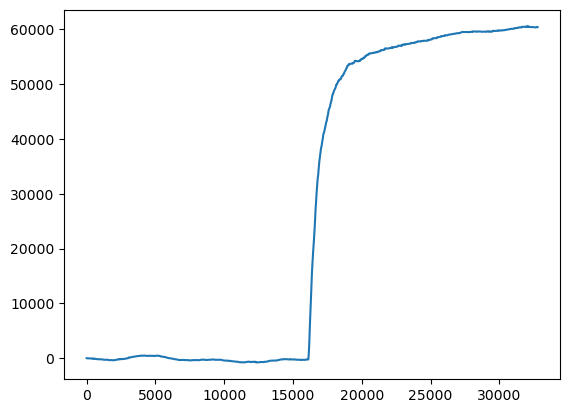

In [22]:
charge = cumulative_trapezoid(voltage, time, initial=0)
plt.plot(time, charge)

The specific shape of this curve (how fast it rises) can be used to determine the energy of the photon that initially hit the scintillator (though this is far beyond the scope of this course)

# Numerical Integration (Given Functions)

If one knows a functional form, however, it is often better to use the `quad` function

* "Knows the functional form" is a vague phrase. In general, if you can write a python function `def some_function(x)` that returns a single number, this means that you know the functional form. This is not the case for discrete data that you collect.

In [23]:
def f(x):
    return np.exp(-np.sin(2*np.pi * x)**2)

In [30]:
quad(f, 0, 1)[0]

0.6450352704491495

This gives an estimate of the integral, along with the error. If you just want the integral, grab the first element of the tuple:

In [ ]:
quad(f, 0, 1)[0]

Some functions take in multiple parameters:

$e^{-a \sin^2(2 \pi b x)}$

In [31]:
def f(x, a, b):
    return np.exp(- a * np.sin(2*np.pi * b*  x)**2)

We need to pass in the arguments after $x$ (i.e. $a$ and $b$) as additional arguments in the integral function

In [32]:
quad(f, 0, 1, args=(2,3))

(0.4657596075936422, 1.4192351651537427e-09)

Sometimes, you may want to evaluate an integrals for many values of a parameter. For example:

* Plot $\int_0^1 e^{-\sin^2 (2\pi a x^2)} dx$ as a function of $a$ from 0 to 2.

Then we need to evaluate the integral for many different values of $a$. The `quad_vec` function is perfect for us.

In [34]:
def f(x,a):
    return np.exp(- np.sin(2*np.pi * a* x**2)**2)

If you try to do the following with `quad`, it won't run (it can only take in scalar arguments). `quad_vec` allows the `args` parameter to be an array, and it will evaluate the integral for each value in the array

In [42]:
a = np.linspace(0,2,100)
integral = quad_vec(f, 0, 1, args=(a,))[0]

Then we can plot

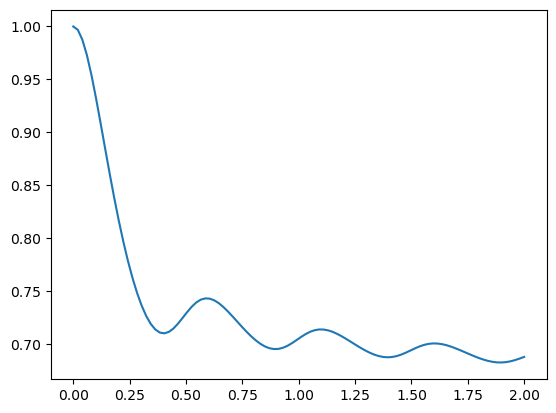

In [43]:
plt.plot(a, integral)
plt.show()

# Double Integrals

It's also possible to compute double integrals and triple integrals with `dbl_quad` and `tpl_quad` (and $n$ dimensional integrals with `nquad`) but this is beyond the scope of what we want to look at here. You can explore the documentation on your own time if you need this functionality!